In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import metrics

C:\Users\Abcd\AppData\Local\Temp\ipykernel_18608\2093886766.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [16]:
y = pd.get_dummies(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)


In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(X_train, y_train)


DecisionTreeClassifier()

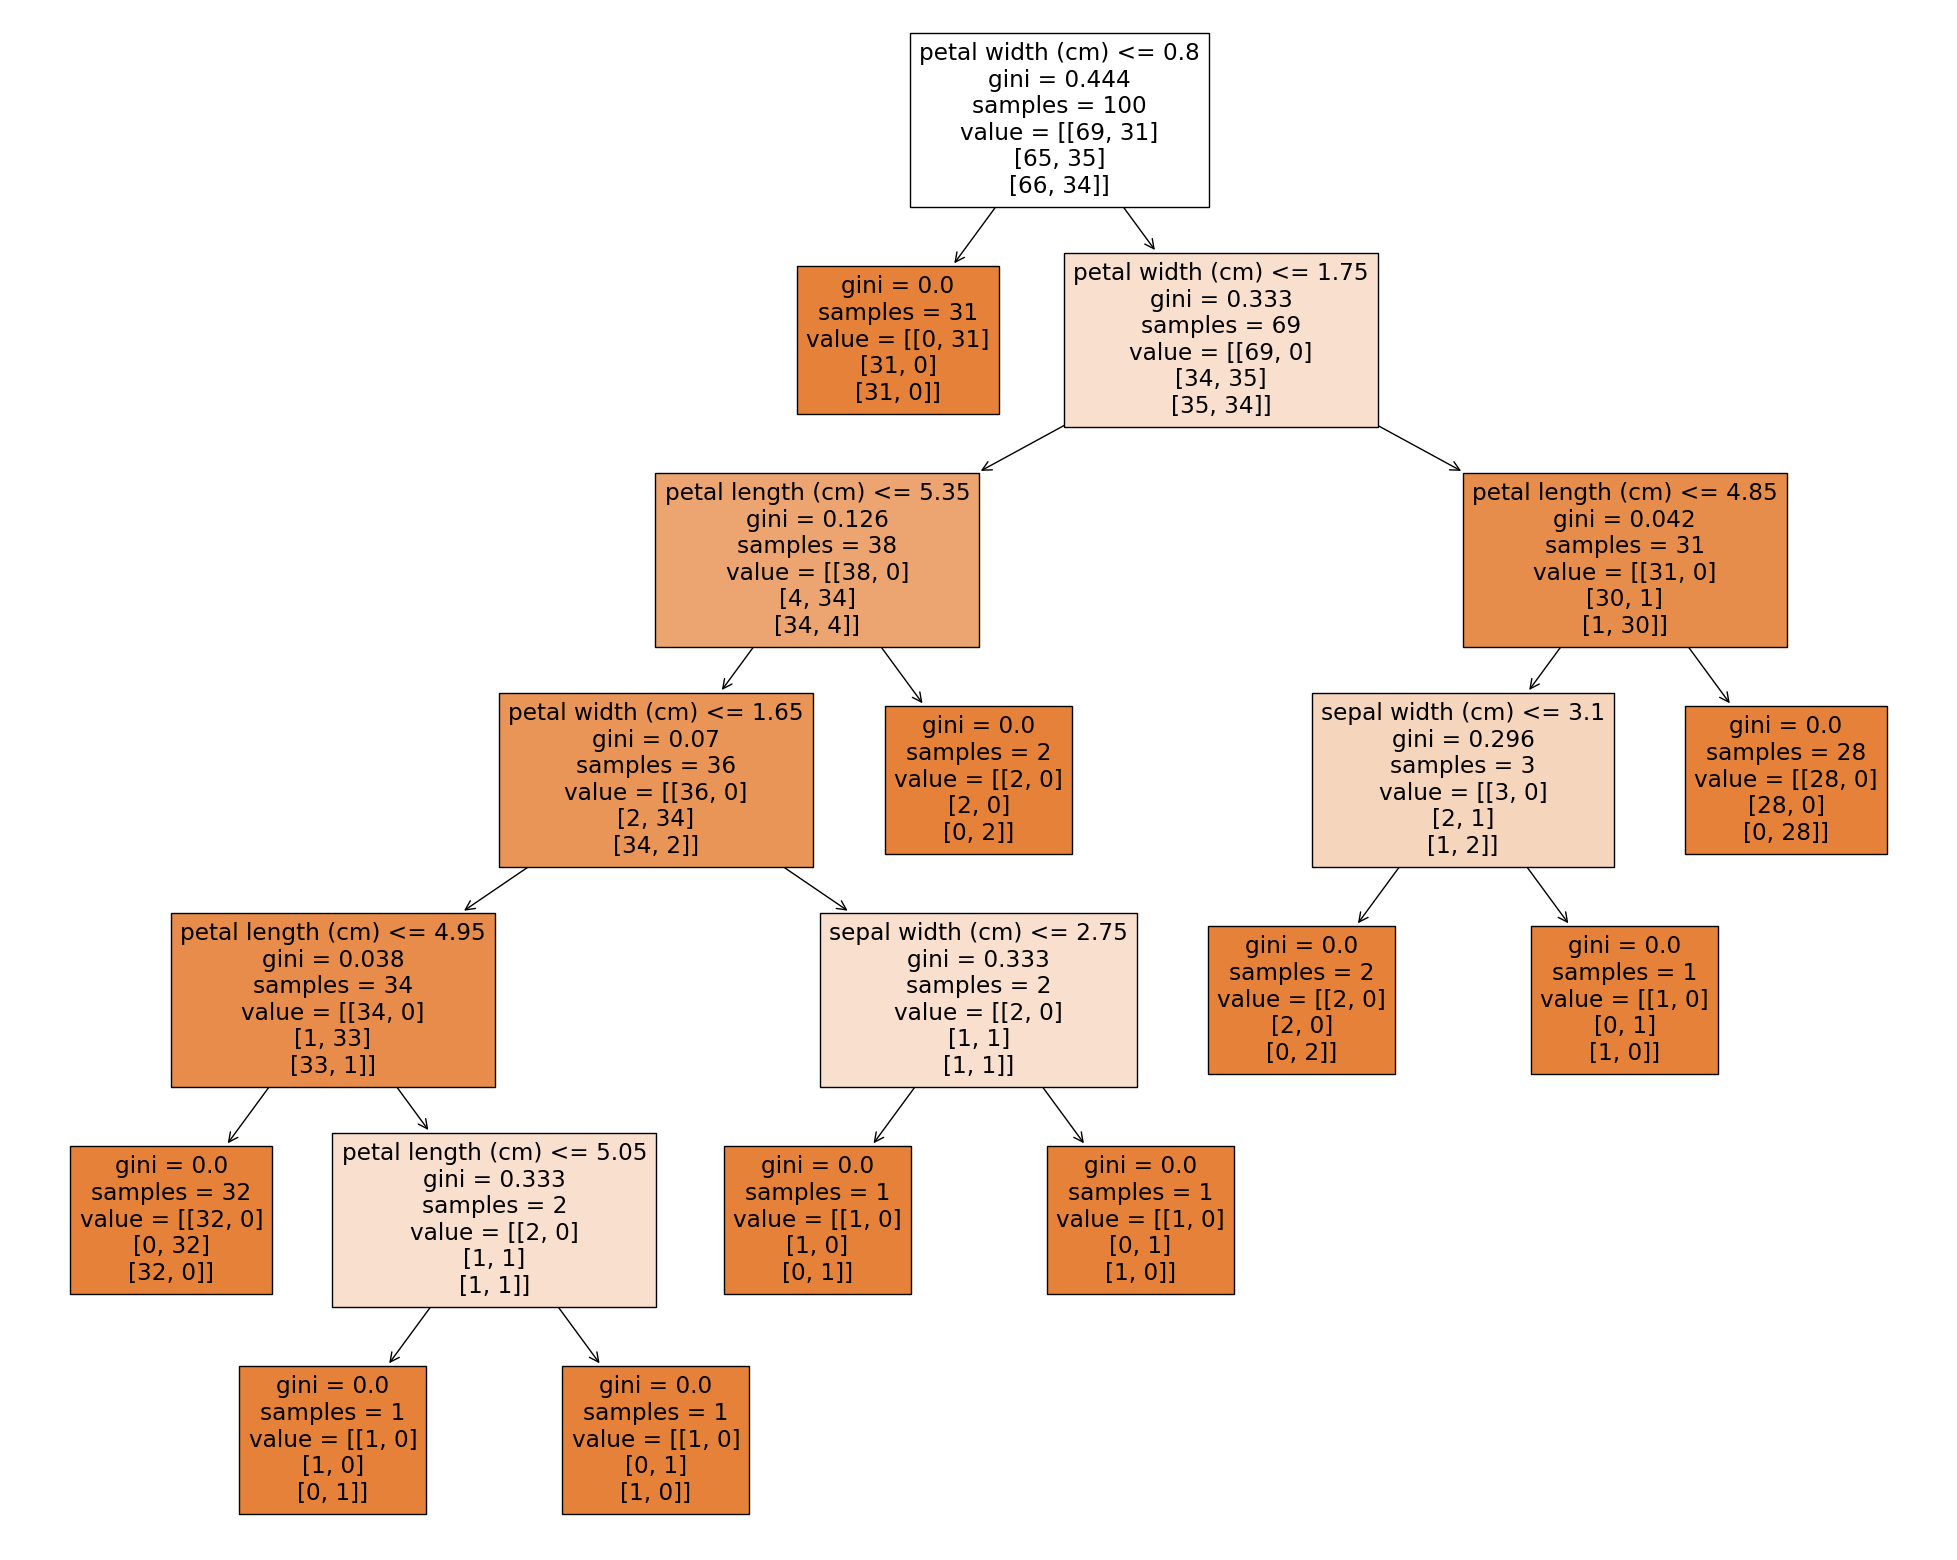

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [21]:
y_pred = dt.predict(X_test)

In [22]:
# numbers on the diagonal of the confusion matrix correspond to correct predictions

species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)